In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
data = pd.concat([pd.DataFrame(load_iris()['data'], columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)']), pd.DataFrame(load_iris()['target'], columns=['plant'])], axis=1)

In [19]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'plant'],
      dtype='object')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

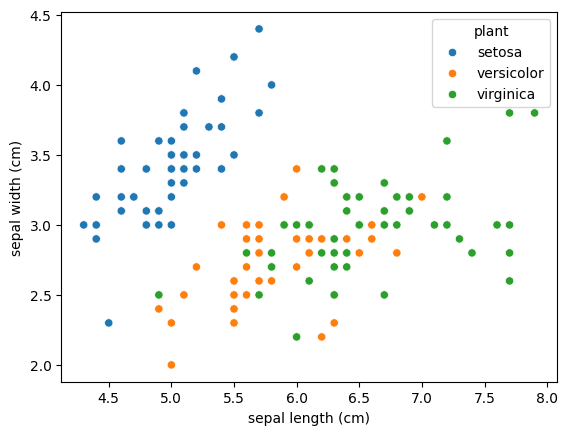

In [20]:
sns.scatterplot(y=data['sepal width (cm)'], x=data['sepal length (cm)'], hue=data.plant.replace({0 : 'setosa', 1:  'versicolor',2: 'virginica'}))


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

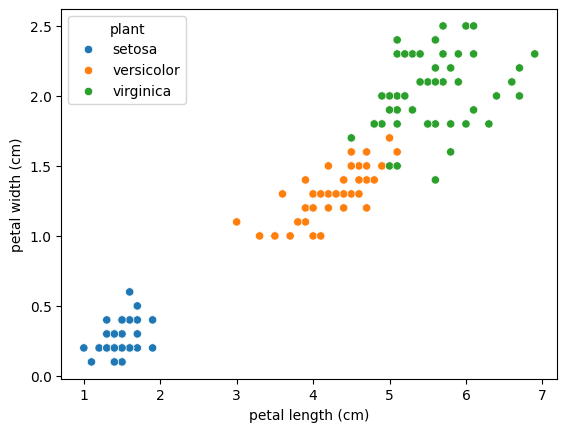

In [21]:
sns.scatterplot(y=data['petal width (cm)'], x=data['petal length (cm)'], hue=data.plant.replace({0 : 'setosa', 1:  'versicolor',2: 'virginica'}))

In [47]:
ss = StandardScaler()
X = load_iris()['data']
X=ss.fit(load_iris()['data']).transform(X.astype(float))
y=load_iris()['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [49]:
KNN = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [50]:
y_pred = KNN.predict(X_test)

In [51]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.80      0.89        10
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



In [52]:
K = 8
accuracy = []
for k in range(1, K+1):
    KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    accuracy.append(accuracy_score(y_true=y_test, y_pred=y_pred))


In [53]:
accuracy

[0.9,
 0.9,
 0.8666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333]

Text(0, 0.5, 'Accuracy')

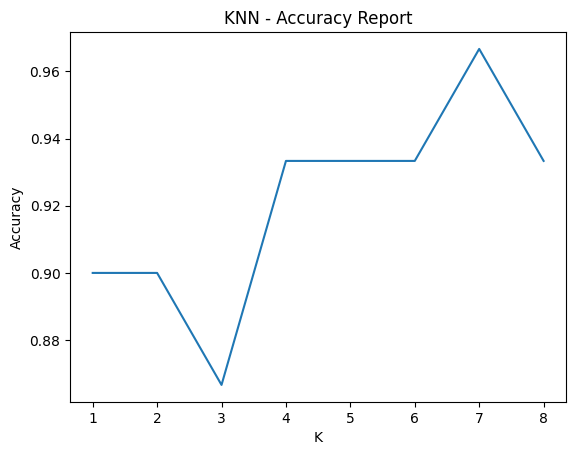

In [54]:
G = sns.lineplot(x=range(1, K+1), y=accuracy)
G.set_title('KNN - Accuracy Report')
G.set_xlabel('K')
G.set_ylabel('Accuracy')